In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

C:\Users\Atowar\AppData\Local\Temp\ipykernel_5124\1395703277.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [13]:

def generate_data():
    
    # Define the range of x-values
    x = np.linspace(0,2*np.pi,100)  # Generate 100 evenly spaced points between 0 and 2*pi

    # Define the equation of the function
    y = np.cos(x)

    noise = np.random.normal(0, 0.1, x.shape)  # Gaussian noise with mean 0 and standard deviation 0.1
    y += noise
    
    return x,y


In [14]:
def plot_data(X,y):
    
    plt.scatter(X, y, color = 'green', label='Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('cosine  Curve Data with Noise')
    plt.legend()
    plt.grid(True)
    plt.show()

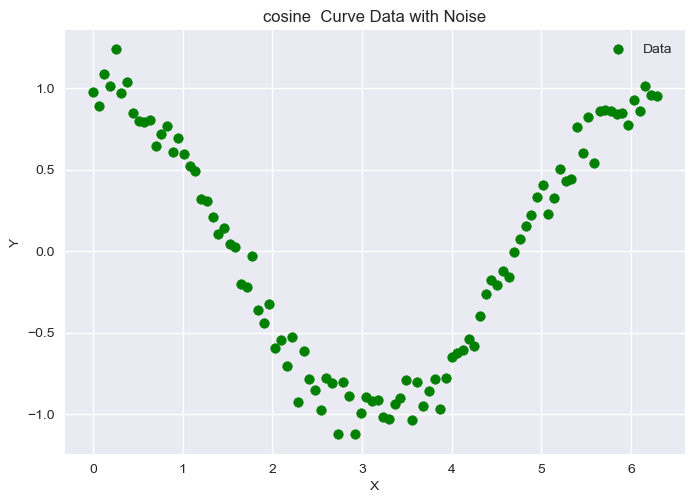

In [15]:
X,y = generate_data()
plot_data(X,y)

In [16]:
def polynomial_transformation(X,degree) :
    
    '''apply polynomial transformation to the x values''' 
        
    x_poly = np.column_stack([ X**i for i in range(1, degree + 1)]) 
    x_poly = np.column_stack([np.ones(len(X)),x_poly]) 
    
    return x_poly

In [17]:
def initialize_coefficient(degree) : 
    return np.zeros(degree + 1) 

def calculate_cost(y,yhat) : 
    return (1 / (2 * len(y))) * np.sum((yhat - y) ** 2)

In [18]:
def train(X,y,deg,lr=0.006, max_epoch = 1500) : 
    
    #initialize the coefficient 
    coefficient = initialize_coefficient(deg)
    costs = []
    for epoch in range(1, max_epoch+1) : 
        
        pred = np.dot(X,coefficient)
        error = pred - y 
        cost = calculate_cost(y,pred)
        costs.append(cost)
        
        if epoch % 100 == 0 :   #print the ,cost after every 10 epoch 
            print(f" Epoch {epoch} cost {cost}")
        
        gradient = np.dot(X.T,error) / len(X)
        coefficient = coefficient - lr * gradient 
    
    return coefficient,costs
        

In [19]:
def predict(X,coeff) :
    
    x_test = np.column_stack([ X**i for i in range(1, len(coeff))])
    x_test = np.column_stack([np.ones(len(X)),x_test]) 
    
    preds = np.dot(x_test,coeff) 
    return preds 
    

In [20]:
def plot_cost(costs) : 
    
    plt.plot(np.arange(1,len(costs)+1), costs,color='red', label="Loss wrt epoch")
    plt.legend() 
    plt.xlabel('Num epoch') 
    plt.ylabel('Cost') 
    plt.show()

In [21]:
def plot_result(x,y,predictions) : 
    
    plt.scatter(x,y,color='green',label='Data points')
    plt.plot(x,predictions,color='red', label='polynomial regression line') 
    plt.xlabel('X')
    plt.ylabel('Y`')
    plt.legend()
    plt.show()

degree = 2,
lr =  0.006
max_epoch = 4500

degree = 3
lr = 0.0002
max_epoch = 4000

In [22]:
degree = 2

In [23]:
X_poly = polynomial_transformation(X,degree=degree)

In [24]:
coeff, costs = train(X_poly,y,deg=degree,lr=0.006, max_epoch=4500)

 Epoch 100 cost 0.19436510975003723
 Epoch 200 cost 0.16922593162817304
 Epoch 300 cost 0.15369806470685732
 Epoch 400 cost 0.14139920086531563
 Epoch 500 cost 0.13067258108142188
 Epoch 600 cost 0.12103550134952037
 Epoch 700 cost 0.11230412596758776
 Epoch 800 cost 0.10437488791196209
 Epoch 900 cost 0.0971694838062966
 Epoch 1000 cost 0.0906206867539846
 Epoch 1100 cost 0.08466837531542801
 Epoch 1200 cost 0.0792581481737875
 Epoch 1300 cost 0.0743406192339012
 Epoch 1400 cost 0.06987091504946784
 Epoch 1500 cost 0.06580825244362941
 Epoch 1600 cost 0.0621155631737584
 Epoch 1700 cost 0.05875915491494608
 Epoch 1800 cost 0.05570840364947105
 Epoch 1900 cost 0.05293547420214086
 Epoch 2000 cost 0.050415066258650686
 Epoch 2100 cost 0.04812418352145745
 Epoch 2200 cost 0.046041923889919775
 Epoch 2300 cost 0.044149288748550106
 Epoch 2400 cost 0.04242900962288182
 Epoch 2500 cost 0.04086539062124461
 Epoch 2600 cost 0.03944416522485339
 Epoch 2700 cost 0.0381523661195519
 Epoch 2800 c

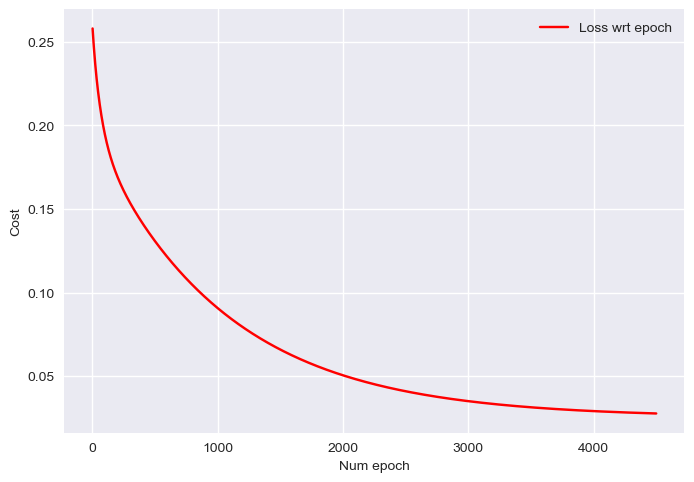

In [25]:
plot_cost(costs)

In [26]:
x_test = np.linspace(0,2*np.pi, 100)
predictions = predict(x_test,coeff)

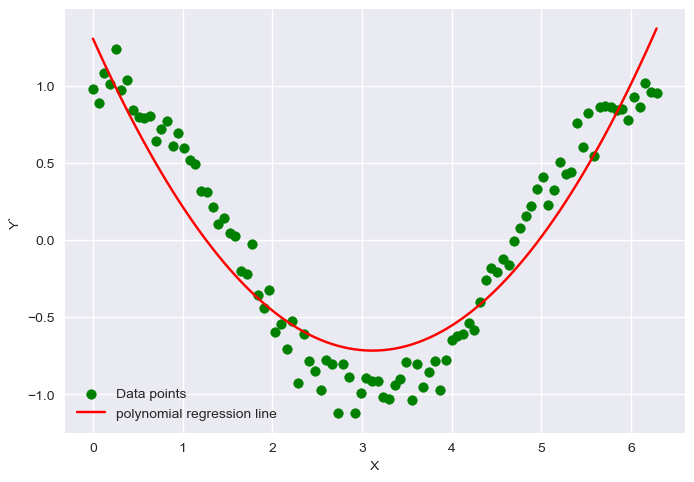

In [27]:
plot_result(X,y, predictions)